# Fitting data of simple pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.constants import g0
from scipy.optimize import curve_fit, minimize
import emcee
import corner

In [2]:
def linear_function(x, a, b):
    return a * x + b

def chi_sq(y_data, y_model, sigma):
    return np.sum((y_data - y_model)**2 / sigma**2)

In [3]:
fname = './data/data_7_group2.csv'
data = pd.read_csv(fname)

In [4]:
print(data.columns)

Index(['L(cm)', '1-10T', '2-10T', '3-10T', '4-10T', '5-10T', 'AVG-10T(s)',
       'L^(1/2)(cm^1/2)'],
      dtype='object')


In [5]:
pendulum_length = np.array(data['L(cm)']) * 1e-2
n_length = len(pendulum_length)
pendulum_length_matrix = np.tile(pendulum_length, 5)
print(pendulum_length)

[0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09  ]


In [6]:
avg_10period      = np.array(data['AVG-10T(s)'])
avg_1period       = avg_10period / 10
period_10swing  = []
for idx, rep in enumerate(range(1,6)):
    period_10swing.append(data[f'{rep}-10T'])
period_10swing = np.array(period_10swing)

std_10period = []
for i in range(n_length):
    std_10period.append(np.std(period_10swing[:, i]))

std_10period = np.array(std_10period)
std_1period = std_10period / np.sqrt(10)

period_10swing = period_10swing.flatten()
period_1swing = period_10swing / 10

In [7]:
print(pendulum_length)
print(pendulum_length_matrix)
print(avg_1period)
print(period_10swing)
print(std_1period)

[0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09  ]
[0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09
 0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09
 0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09
 0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09
 0.5625 0.4815 0.4225 0.36   0.3025 0.25   0.2025 0.16   0.1225 0.09  ]
[1.552 1.375 1.317 1.269 1.124 1.036 0.961 0.841 0.733 0.645]
[15.63 13.75 13.21 12.83 11.23 10.33  9.45  8.41  7.36  6.31 15.55 13.61
 13.21 12.55 11.21 10.41  9.76  8.36  7.36  6.5  15.28 13.91 13.15 12.61
 11.3  10.35  9.5   8.43  7.31  6.56 15.46 13.41 13.23 12.81 11.19 10.36
  9.66  8.36  7.33  6.45 15.66 14.06 13.06 12.63 11.28 10.35  9.68  8.51
  7.31  6.45]
[0.04329434 0.07167705 0.0196367  0.03564267 0.01317574 0.00848528
 0.03676955 0.01750429 0.0070993  0.02612279]


In [8]:
l_axis = np.linspace(0.01, 0.60, 100)
t_ideal = 2 * np.pi * np.sqrt(l_axis / g0.value)

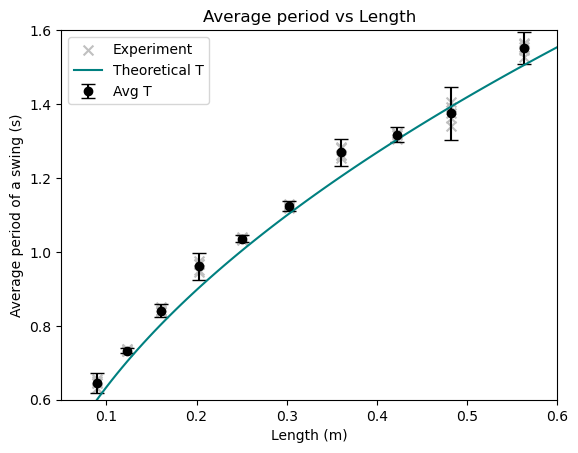

In [9]:
plt.scatter(pendulum_length_matrix, period_1swing, s=50, marker='x', color='silver',
            label=f'Experiment')
    
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal')
plt.xlabel('Length (m)')
plt.ylabel('Average period of a swing (s)')
plt.xlim(left=0.05, right=0.6)
plt.ylim(bottom=0.6, top=1.6)
plt.title('Average period vs Length')
plt.legend()
plt.show()

## curve_fit

In [10]:
propt, _ = curve_fit(linear_function, np.log(pendulum_length_matrix), np.log(period_1swing.flatten()))
print(propt)

[0.47067886 0.69149614]


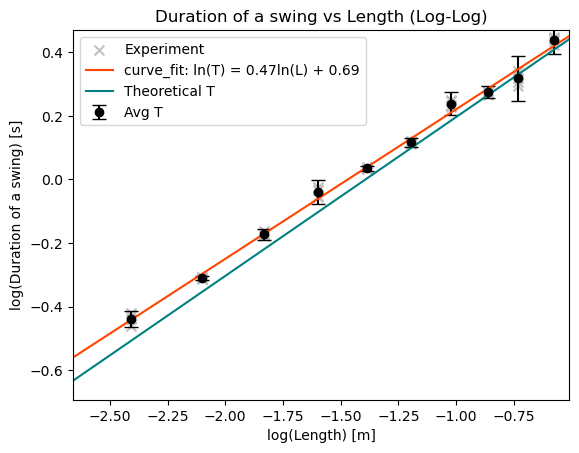

In [11]:
plt.scatter(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(np.log(pendulum_length), np.log(avg_1period), yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *propt), color='orangered', label=f'curve_fit: ln(T) = {propt[0]:.2f}ln(L) + {propt[1]:.2f}')
plt.plot(np.log(l_axis), np.log(t_ideal), label='Theoretical T', color='teal')
plt.xlabel('log(Length) [m]')
plt.ylabel('log(Duration of a swing) [s]')
plt.title('Duration of a swing vs Length (Log-Log)')
plt.xlim(left=np.log(0.07), right=np.log(0.6))
plt.ylim(bottom=np.log(0.5), top=np.log(1.6))
plt.legend()
plt.show()

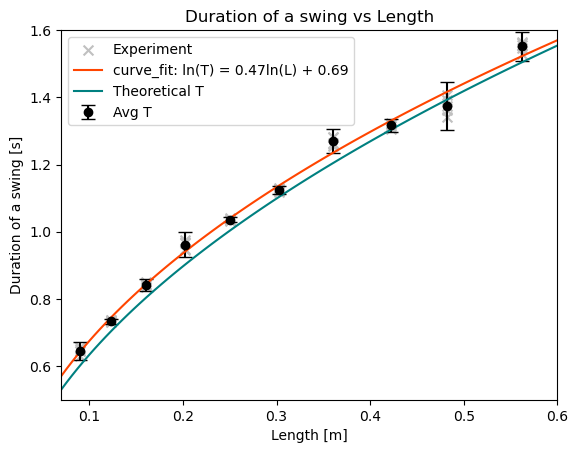

In [12]:
plt.scatter(pendulum_length_matrix, period_1swing.flatten(), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *propt), color='orangered', label=f'curve_fit: ln(T) = {propt[0]:.2f}ln(L) + {propt[1]:.2f}')
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal')
plt.xlabel('Length [m]')
plt.ylabel('Duration of a swing [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=0.07, right=0.6)
plt.ylim(bottom=0.5, top=1.6)
plt.legend()
plt.show()

In [13]:
g_fitted = np.e**(2*(np.log(2*np.pi) - propt[1]))
print(f'Ideal g = {g0.value:.3f} m/s^2')
print(f'Fitted g = {g_fitted:.3f} m/s^2')
print(f'Error = {np.abs(g_fitted - g0.value) / g0.value * 100:.3f}%')

Ideal g = 9.807 m/s^2
Fitted g = 9.902 m/s^2
Error = 0.975%


## Least-square

In [14]:
A = np.vander(np.log(pendulum_length_matrix), 2)
C = np.diag(np.log(np.tile(std_1period, 5)) * np.log(np.tile(std_1period, 5)))
ATA = np.dot(A.T, A / (np.log(np.tile(std_1period, 5))**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, np.log(period_1swing) / np.log(np.tile(std_1period, 5))**2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))
m_ls = w[0]
b_ls = w[1]


Least-squares estimates:
m = 0.466 ± 0.873
b = 0.686 ± 1.208


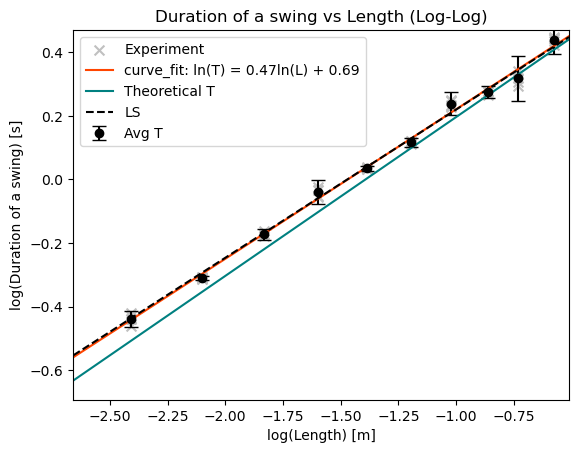

In [15]:
plt.scatter(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(np.log(pendulum_length), np.log(avg_1period), yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *propt), color='orangered', label=f'curve_fit: ln(T) = {propt[0]:.2f}ln(L) + {propt[1]:.2f}')
plt.plot(np.log(l_axis), np.log(t_ideal), label='Theoretical T', color='teal')
plt.plot(np.log(l_axis), np.dot(np.vander(np.log(l_axis), 2), w), "--k", label="LS")
plt.xlabel('log(Length) [m]')
plt.ylabel('log(Duration of a swing) [s]')
plt.title('Duration of a swing vs Length (Log-Log)')
plt.xlim(left=np.log(0.07), right=np.log(0.6))
plt.ylim(bottom=np.log(0.5), top=np.log(1.6))
plt.legend()
plt.show()


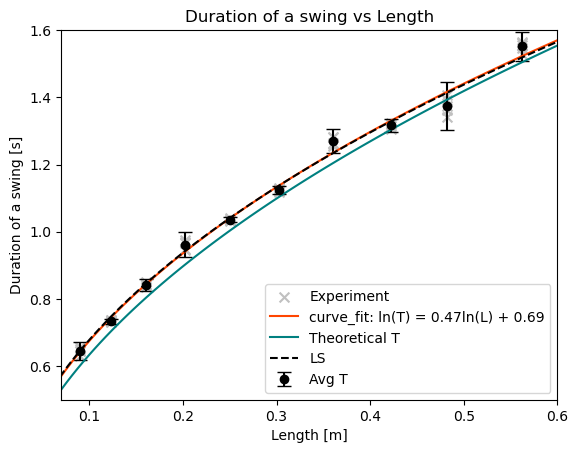

In [16]:
plt.scatter(pendulum_length_matrix, period_1swing.flatten(), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *propt), color='orangered', label=f'curve_fit: ln(T) = {propt[0]:.2f}ln(L) + {propt[1]:.2f}')
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal')
plt.plot(l_axis, np.e**np.dot(np.vander(np.log(l_axis), 2), w), "--k", label="LS")
plt.xlabel('Length [m]')
plt.ylabel('Duration of a swing [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=0.07, right=0.6)
plt.ylim(bottom=0.5, top=1.6)
plt.legend()
plt.show()

In [17]:
g_fitted = np.e**(2*(np.log(2*np.pi) - w[1]))
print(f'Ideal g = {g0.value:.3f} m/s^2')
print(f'Fitted g = {g_fitted:.3f} m/s^2')
print(f'Error = {np.abs(g_fitted - g0.value) / g0.value * 100:.3f}%')

Ideal g = 9.807 m/s^2
Fitted g = 10.003 m/s^2
Error = 2.001%


## Chi-square

In [18]:
# Define the chi-squared function
def chi_sq_optimization(params, x_data, y_data, sigma):
    model = linear_function(x_data, *params)  # Use your model function
    return chi_sq(y_data, model, sigma)

# Initial guess for the parameters
initial_guess = [0.5, 0.5]  # Adjust based on your model

# Perform the optimization
result = minimize(chi_sq_optimization, initial_guess, 
                  args=(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), np.log(np.tile(std_1period, 5))))

# Extract the optimized parameters
optimized_params = result.x
m_chisq = optimized_params[0]
b_chisq = optimized_params[1]
print("Optimized parameters:", optimized_params)

Optimized parameters: [0.46647753 0.68644098]


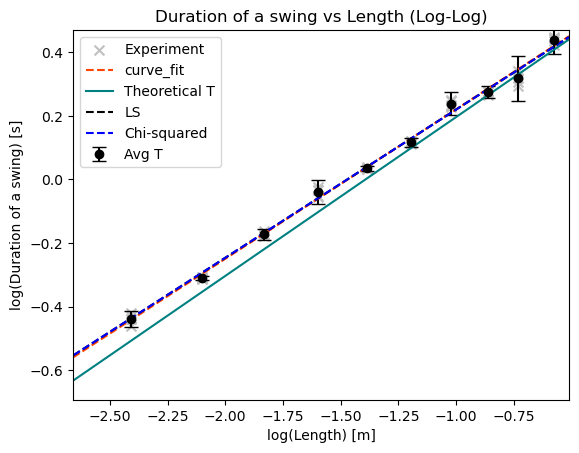

In [19]:
plt.scatter(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(np.log(pendulum_length), np.log(avg_1period), yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *propt), color='orangered',linestyle='dashed', 
         label=f'curve_fit')
plt.plot(np.log(l_axis), np.log(t_ideal), label='Theoretical T', color='teal')
plt.plot(np.log(l_axis), np.dot(np.vander(np.log(l_axis), 2), w), "--k", label="LS")
plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *optimized_params), "--b", label="Chi-squared")
plt.xlabel('log(Length) [m]')
plt.ylabel('log(Duration of a swing) [s]')
plt.title('Duration of a swing vs Length (Log-Log)')
plt.xlim(left=np.log(0.07), right=np.log(0.6))
plt.ylim(bottom=np.log(0.5), top=np.log(1.6))
plt.legend()
plt.show()


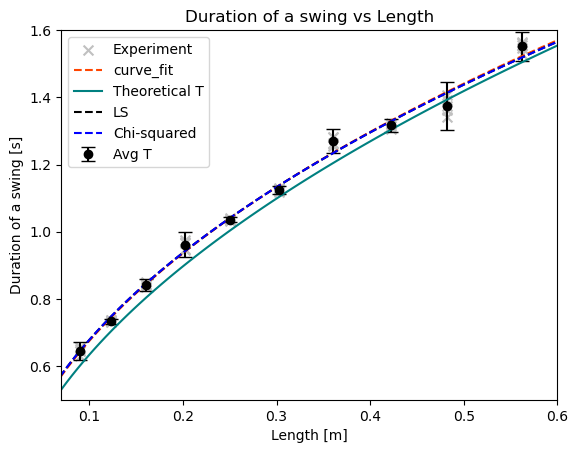

In [20]:
plt.scatter(pendulum_length_matrix, period_1swing.flatten(), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *propt), color='orangered',linestyle='dashed', 
         label=f'curve_fit')
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal')
plt.plot(l_axis, np.e**np.dot(np.vander(np.log(l_axis), 2), w), "--k", label="LS")
plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *optimized_params), "--b", label="Chi-squared")
plt.xlabel('Length [m]')
plt.ylabel('Duration of a swing [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=0.07, right=0.6)
plt.ylim(bottom=0.5, top=1.6)
plt.legend()
plt.show()

In [21]:
g_fitted = np.e**(2*(np.log(2*np.pi) - b_chisq))
print(f'Ideal g = {g0.value:.3f} m/s^2')
print(f'Fitted g = {g_fitted:.3f} m/s^2')
print(f'Error = {np.abs(g_fitted - g0.value) / g0.value * 100:.3f}%')

Ideal g = 9.807 m/s^2
Fitted g = 10.003 m/s^2
Error = 2.001%


## MCMC

In [22]:
# Define the log-likelihood function
def log_likelihood(params, x_data, y_data, sigma):
    model = linear_function(x_data, *params)
    return -chi_sq(y_data, model, sigma)

# Define the log-prior function (flat priors in this case)
def log_prior(params):
    a, b = params
    if -10 < a < 10 and -10 < b < 10:  # Adjust bounds as needed
        return 0.0  # Flat prior
    return -np.inf  # Log(0) for invalid parameters

# Define the log-posterior function
def log_posterior(params, x_data, y_data, sigma):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x_data, y_data, sigma)


In [23]:

# Set up the MCMC sampler
ndim = 2  # Number of parameters (a and b)
nwalkers = 20  # Number of walkers
nsteps = 50000  # Number of steps
initial_guess = [m_chisq, b_chisq]  # Initial guess for parameters
pos = initial_guess + 1e-4 * np.random.randn(nwalkers, ndim)  # Initialize walkers


In [24]:
progress_file = "progress.h5"
backend = emcee.backends.HDFBackend(progress_file)

# Initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, backend=backend, 
                                args=(np.log(pendulum_length_matrix), 
                                      np.log(period_1swing.flatten()), 
                                      np.log(np.tile(std_1period, 5))))

# Run the MCMC
sampler.run_mcmc(pos, nsteps, progress=True)


100%|██████████| 50000/50000 [01:45<00:00, 475.37it/s]


State([[ 0.2960052   0.37639673]
 [ 0.4994186   0.26132906]
 [ 0.76898469  0.64294403]
 [-0.21428283 -0.03106016]
 [-0.37199867 -0.93756493]
 [ 0.45241486  0.9121633 ]
 [-1.1473852  -0.92544565]
 [ 0.7552812   0.55207925]
 [ 0.8710548   1.49371388]
 [ 0.12953243  0.07758687]
 [ 1.36442318  2.40790842]
 [ 0.40150872  0.08541407]
 [ 0.19764592 -0.12172138]
 [ 0.84259946  1.51920349]
 [ 1.35646465  1.49058176]
 [ 0.21561645  0.73437606]
 [ 1.37657476  1.28799831]
 [ 0.79559435  1.10621935]
 [-0.12676297  0.14206798]
 [ 0.76728558  0.16437014]], log_prob=[-0.07543128 -0.83684888 -0.80758162 -0.68172562 -2.1787569  -0.22902095
 -4.07425738 -1.056549   -0.56087477 -0.28363226 -2.41651015 -1.04148119
 -0.94630284 -0.6865785  -1.4156944  -0.58837497 -2.20744696 -0.14422844
 -0.61697562 -3.22034414], blobs=None, random_state=('MT19937', array([ 119018777, 2983783971,  768571597, 1246839281, 1260597600,
       4146456517, 3791780496, 1008291314, 2577874183, 1679130391,
       3401913947, 3474676

In [25]:
sampler = emcee.backends.HDFBackend("progress.h5")

# Extract the samples
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Print the results
m_mcmc, b_mcmc = np.mean(samples, axis=0)
print(f"MCMC results: m = {m_mcmc:.3f}, b = {b_mcmc:.3f}")

MCMC results: m = 0.467, b = 0.686


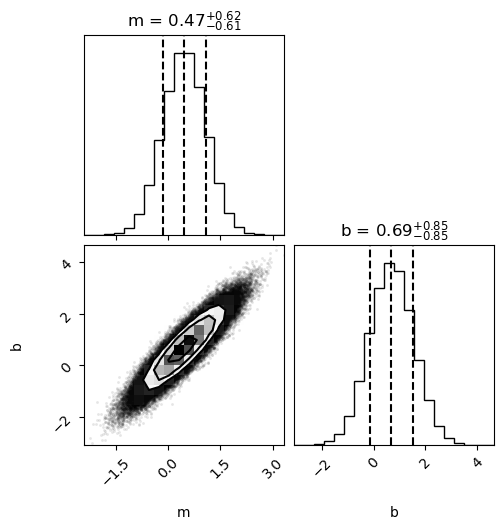

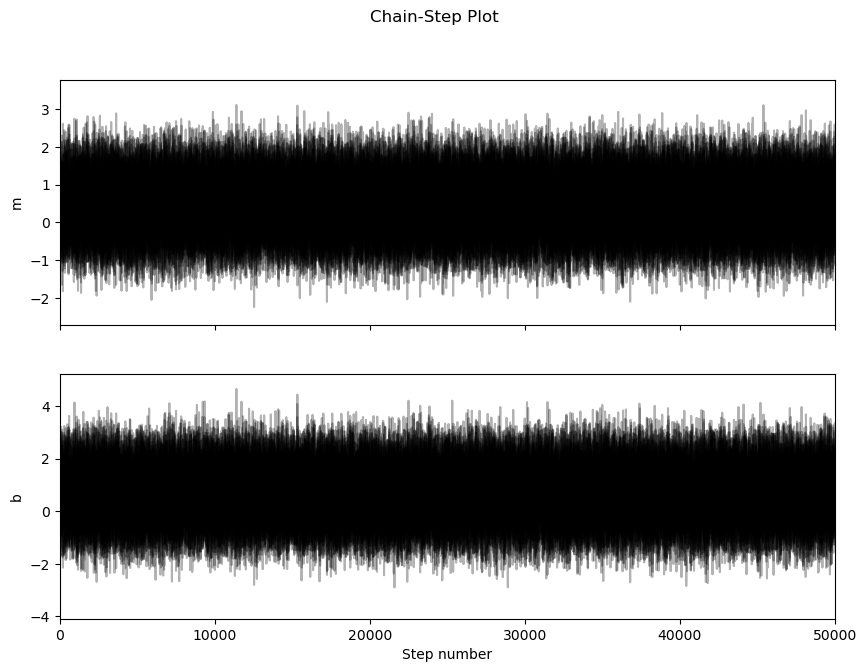

In [26]:
# Corner plot
fig_corner = corner.corner(samples, labels=['m', 'b'], show_titles=True, plot_datapoints=True, quantiles=[0.16, 0.5, 0.84])
# fig_corner.suptitle("Corner Plot of MCMC Results")
plt.show()

# Chain-step plot
fig_chain, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
for i in range(ndim):
    ax = axes[i]
    ax.plot(sampler.get_chain()[:, :, i], "k", alpha=0.3)
    if i == 0:
        ax.set_ylabel("m")
    else:
        ax.set_ylabel(f"b")
    ax.set_xlim(left=0, right=nsteps)
axes[-1].set_xlabel("Step number")
fig_chain.suptitle("Chain-Step Plot")
plt.show()


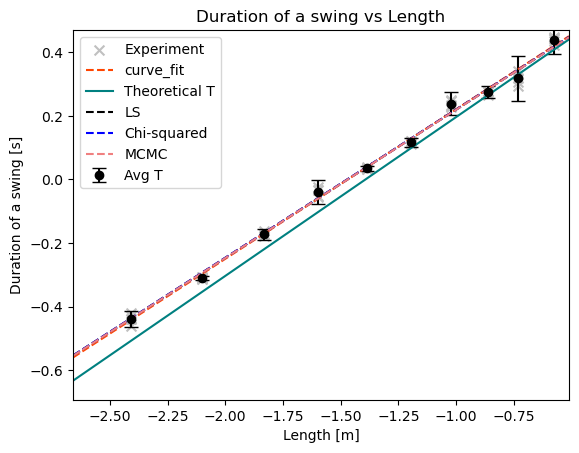

In [27]:
plt.scatter(np.log(pendulum_length_matrix), np.log(period_1swing.flatten()), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(np.log(pendulum_length), np.log(avg_1period), yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *propt), color='orangered',linestyle='dashed', 
         label=f'curve_fit')
plt.plot(np.log(l_axis), np.log(t_ideal), label='Theoretical T', color='teal')
plt.plot(np.log(l_axis), np.dot(np.vander(np.log(l_axis), 2), w), "--k", label="LS")
plt.plot(np.log(l_axis), linear_function(np.log(l_axis), *optimized_params), "--b", label="Chi-squared")
plt.plot(np.log(l_axis), (m_mcmc*np.log(l_axis)+b_mcmc), color='lightcoral',linestyle='dashed', label=f'MCMC')
plt.xlabel('Length [m]')
plt.ylabel('Duration of a swing [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=np.log(0.07), right=np.log(0.6))
plt.ylim(bottom=np.log(0.5), top=np.log(1.6))
plt.legend()
plt.show()

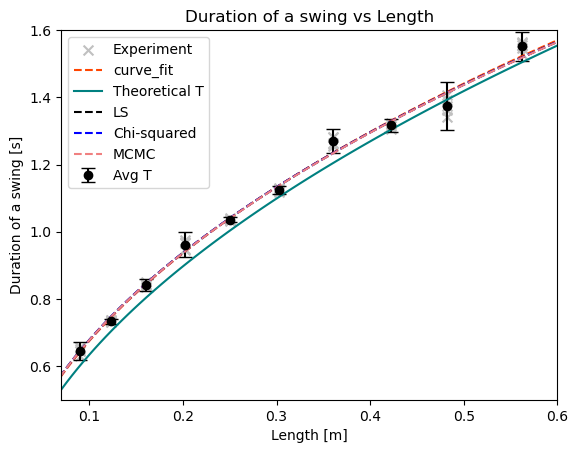

In [28]:
plt.scatter(pendulum_length_matrix, period_1swing.flatten(), s=50, marker='x', color='silver', label='Experiment')
plt.errorbar(pendulum_length, avg_1period, yerr=std_1period, fmt='o', label='Avg T', color='k', capsize=5)
plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *propt), color='orangered',linestyle='dashed', 
         label=f'curve_fit')
plt.plot(l_axis, t_ideal, label='Theoretical T', color='teal')
plt.plot(l_axis, np.e**np.dot(np.vander(np.log(l_axis), 2), w), "--k", label="LS")
plt.plot(l_axis, np.e**linear_function(np.log(l_axis), *optimized_params), "--b", label="Chi-squared")
plt.plot(l_axis, np.e**(m_mcmc*np.log(l_axis)+b_mcmc), color='lightcoral',linestyle='dashed', label=f'MCMC')
plt.xlabel('Length [m]')
plt.ylabel('Duration of a swing [s]')
plt.title('Duration of a swing vs Length')
plt.xlim(left=0.07, right=0.6)
plt.ylim(bottom=0.5, top=1.6)
plt.legend()
plt.show()

In [29]:
g_fitted = np.e**(2*(np.log(2*np.pi) - b_mcmc))
print(f'Ideal g = {g0.value:.3f} m/s^2')
print(f'Fitted g = {g_fitted:.3f} m/s^2')
print(f'Error = {np.abs(g_fitted - g0.value) / g0.value * 100:.3f}%')

Ideal g = 9.807 m/s^2
Fitted g = 10.009 m/s^2
Error = 2.066%
